In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/2000
2/2 [==============================] - 1s 195ms/step - loss: 4430.2939 - val_loss: 6685.2456
Epoch 2/2000
2/2 [==============================] - 0s 35ms/step - loss: 1038.6080 - val_loss: 302.9661
Epoch 3/2000
2/2 [==============================] - 0s 39ms/step - loss: 150.4755 - val_loss: 962.1248
Epoch 4/2000
2/2 [==============================] - 0s 33ms/step - loss: 658.2889 - val_loss: 2328.2773
Epoch 5/2000
2/2 [==============================] - 0s 35ms/step - loss: 1002.3750 - val_loss: 1901.2607
Epoch 6/2000
2/2 [==============================] - 0s 57ms/step - loss: 811.2955 - val_loss: 720.4944
Epoch 7/2000
2/2 [==============================] - 0s 38ms/step - loss: 436.1590 - val_loss: 93.4713
Epoch 8/2000
2/2 [==============================] - 0s 34ms/step - loss: 147.3174 - val_loss: 651.1646
Epoch 9/2000
2/2 [==============================] - 0s 38ms/step - loss: 192.6733 - val_loss: 1702.0195
Epoch 10/2000
2/2 [==============================] - 0s 35ms/step 

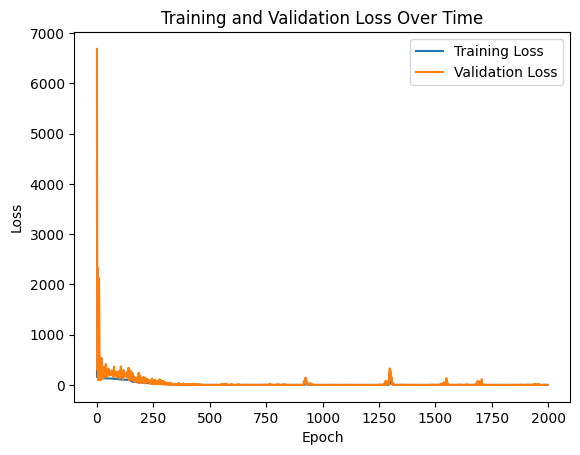

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Установка seed для воспроизводимости результатов
tf.random.set_seed(8)

# Определение функции для построения графика потерь
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Time')
    plt.legend()
    plt.show()

# Путь к файлам тренировочного и тестового наборов данных
train_file_path = "/content/drive/MyDrive/trainkir.xlsx"
test_file_path = "/content/drive/MyDrive/testkir.xlsx"

# Загрузка данных из файлов Excel
train_data = pd.read_excel(train_file_path)
test_data = pd.read_excel(test_file_path)

# Удалим лишние пробелы в именах столбцов
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Преобразование столбцов 'size' и 'area' в тип float
train_data['area'] = train_data['area'].astype(float)
test_data['area'] = test_data['area'].astype(float)

# Преобразование столбца 'date' в числовой формат
train_data['date'] = (train_data['date'] - train_data['date'].min()) / pd.Timedelta(days=1)
test_data['date'] = (test_data['date'] - test_data['date'].min()) / pd.Timedelta(days=1)

# Подготовка данных для обучения модели
x_train = train_data[['date', 'area']]  # Используем только столбцы 'data' и 'area' для обучения
y_train = train_data['area']            # Предсказываем 'area'

# Создание модели
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Компиляция модели с уменьшенной скоростью обучения
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Обучение модели с валидацией
history = model.fit(x_train, y_train, epochs=2000, validation_split=0.2, verbose=1)

# Визуализация результатов обучения
plot_loss(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Установка seed для воспроизводимости результатов
tf.random.set_seed(8)

# Определение слоя
class SinLayer(layers.Layer):
    def __init__(self, number_of_sinuses):
        super(SinLayer, self).__init__()
        self.number_of_sinuses = number_of_sinuses

    def build(self, input_shape):
        self.kernel = self.add_weight(
            "kernel", shape=(self.number_of_sinuses, 3), trainable=True
        )
        self.bias = self.add_weight(name="bias", shape=(), trainable=True)

    def call(self, inputs):
        result = 0
        for i in range(self.number_of_sinuses):
            result += self.kernel[i][0] * tf.sin(
                self.kernel[i][1] * inputs + self.kernel[i][2]
            )
        return result + self.bias

# Определение модели
def create_model(number_of_sinuses):
    model = models.Sequential([
        layers.Input(shape=(2,)),
        SinLayer(number_of_sinuses)
    ])
    return model

# Компиляция модели
def compile_model(model):
    model.compile(optimizer=Adam(0.001, 0.8, 0.9), loss="mean_squared_error")
    return model


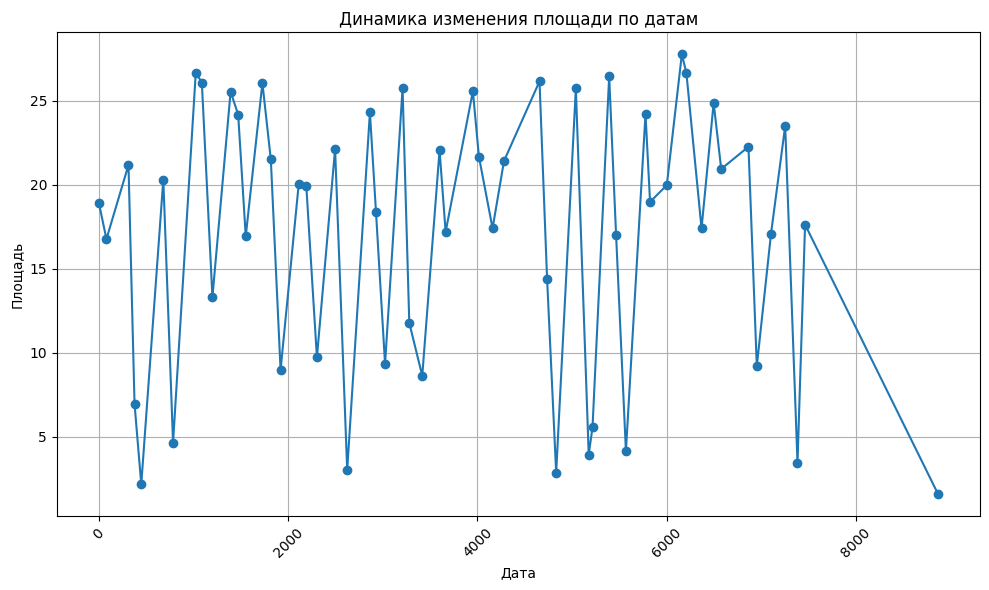

In [ ]:
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['area'], marker='o', linestyle='-')
plt.title('Динамика изменения площади по датам')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.xticks(rotation=45)  # Поворот меток по оси x для лучшей читаемости
plt.grid(True)
plt.tight_layout()

# Показ графика
plt.show()


1/1 [==============================] - 0s 370ms/step


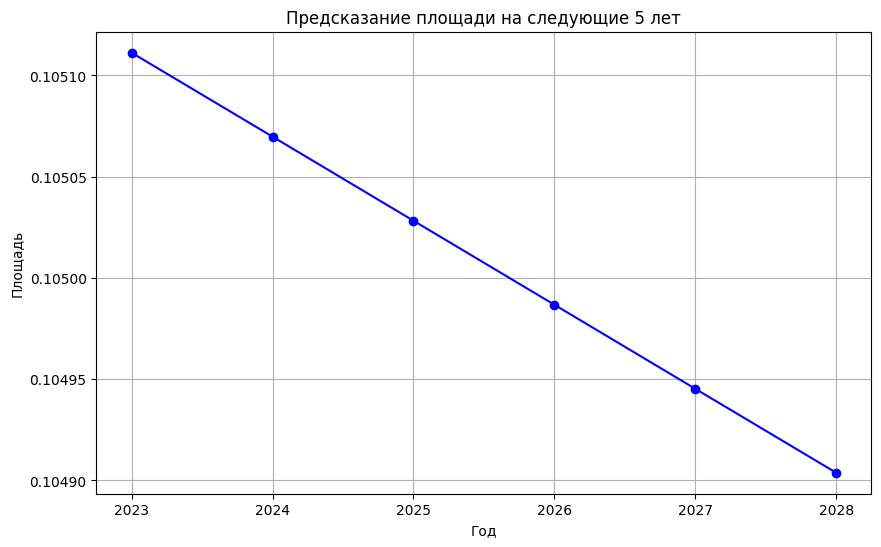

In [ ]:
# Создание данных для предсказания на следующие 5 лет
future_years = pd.DataFrame({'year': range(2023, 2029)})
future_years['date'] = (future_years['year'] - train_data['date'].min()) / (train_data['date'].max() - train_data['date'].min())

# Предсказание площади на следующие 5 лет
predicted_area = model.predict(future_years[['date']])

# Визуализация предсказанных значений
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(future_years['year'], predicted_area, marker='o', linestyle='-', color='b')
plt.title('Предсказание площади на следующие 5 лет')
plt.xlabel('Год')
plt.ylabel('Площадь')
plt.grid(True)
plt.show()


# **Статья**

In [ ]:
# Импорт библиотек
from datetime import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Выгрузка данных из таблицы с тренировочными данными
train_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/trainkir.csv").values

# Выгрузка данных из таблицы с тестовыми данными
test_data: np.ndarray = pd.read_csv("/content/drive/MyDrive/testkir.csv").values

In [ ]:
# Импорт библиотек
from datetime import datetime
import numpy as np
import pandas as pd

# Функция перевода даты в количество дней от 1999-07-19
def days_since_zero_date(date_str: str) -> int:
    # Преобразование строки в объект datetime
    date_format: str = "%d.%m.%Y"
    date_obj = datetime.strptime(date_str, date_format)

    # Нулевая дата
    zero_date = datetime.strptime("19.07.1999", date_format)

    # Вычисление разницы в днях
    delta = date_obj - zero_date
    days = delta.days
    return days

# Загрузка данных из таблицы с тренировочными данными
train_data = pd.read_csv("/content/drive/MyDrive/trainkir.csv", delimiter=';')

# Применение функции days_since_zero_date ко всем датам в тренировочном датасете
train_data["date"] = train_data["date"].apply(days_since_zero_date)

# Нормализация столбца "area"
train_data["area"] = train_data["area"].str.replace(',', '.').astype(float)

# Вывод первых строк нормализованных тренировочных данных
print("Train Data:")
print(train_data.head())

# Загрузка данных из таблицы с тестовыми данными
test_data = pd.read_csv("/content/drive/MyDrive/testkir.csv", delimiter=';')

# Применение функции days_since_zero_date ко всем датам в тестовом датасете
test_data["date"] = test_data["date"].apply(days_since_zero_date)

# Нормализация столбца "area"
test_data["area"] = test_data["area"].str.replace(',', '.').astype(float)

# Вывод первых строк нормализованных тестовых данных
print("\nTest Data:")
print(test_data.head())


Train Data:
   date   area
0     0  18.92
1    80  16.76
2   313  21.17
3   377   6.94
4   448   2.16

Test Data:
   date   area
0     0  18.92
1    80  16.76
2   313  21.17
3   448   2.16
4   681  20.30


In [ ]:
import pandas as pd

# Укажите путь к вашему CSV-файлу
file_path = "/content/drive/MyDrive/trainkir.csv"

# Прочтите только первую строку файла, чтобы определить разделитель
with open(file_path, 'r') as file:
    first_line = file.readline()

print("Первая строка из файла:", first_line)


Первая строка из файла: ﻿date;area



In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

# Загрузка CSV-файла в DataFrame
train_data = pd.read_csv("/content/drive/MyDrive/trainkir.csv", delimiter=';')

# Преобразование столбца "date" в формат даты
train_data['date'] = pd.to_datetime(train_data['date'], format='%d.%m.%Y')

# Отображение первых нескольких строк данных
print("Исходные тренировочные данные:")
print(train_data.head())

class Normalize:
    def __init__(self, data: np.ndarray) -> None:
        self.data: np.ndarray = np.copy(data)  # Создание копии данных

        # Вычисление среднего для каждого столбца
        self.__mean: np.ndarray = data.mean(axis=0)
        # Вычисление стандартного отклонения для каждого столбца
        self.__std_dev: np.ndarray = data.std(axis=0)

    def normalizeData(self) -> np.ndarray:
        # Нормализация данных с использованием формулы
        return (self.data - self.__mean) / self.__std_dev

    def DeNormalizeData(
        self, normalized_data: np.ndarray, axes: list[int] = [0, 1, 2, 3]
    ) -> np.ndarray:
        # Денормализация данных по указанным осям
        return normalized_data * self.__std_dev[axes] + self.__mean[axes]

# Преобразование значений столбца "area" в числа с плавающей запятой
train_data['area'] = train_data['area'].str.replace(',', '.').astype(float)

# Получение только числовых данных для нормализации
train_data_numeric = train_data['area'].values.reshape(-1, 1)

# Нормализация числовых данных
train_normalize_class = Normalize(train_data_numeric)
train_data_normalized = train_normalize_class.normalizeData()

# Отображение первых нескольких строк нормализованных данных
print("\nНормализованные тренировочные данные:")
print(train_data_normalized[:5])


Исходные тренировочные данные:
        date   area
0 1999-07-19  18,92
1 1999-10-07  16,76
2 2000-05-27  21,17
3 2000-07-30   6,94
4 2000-10-09   2,16

Нормализованные тренировочные данные:
[[ 0.21959298]
 [-0.05474784]
 [ 0.50536467]
 [-1.30198248]
 [-1.90908855]]


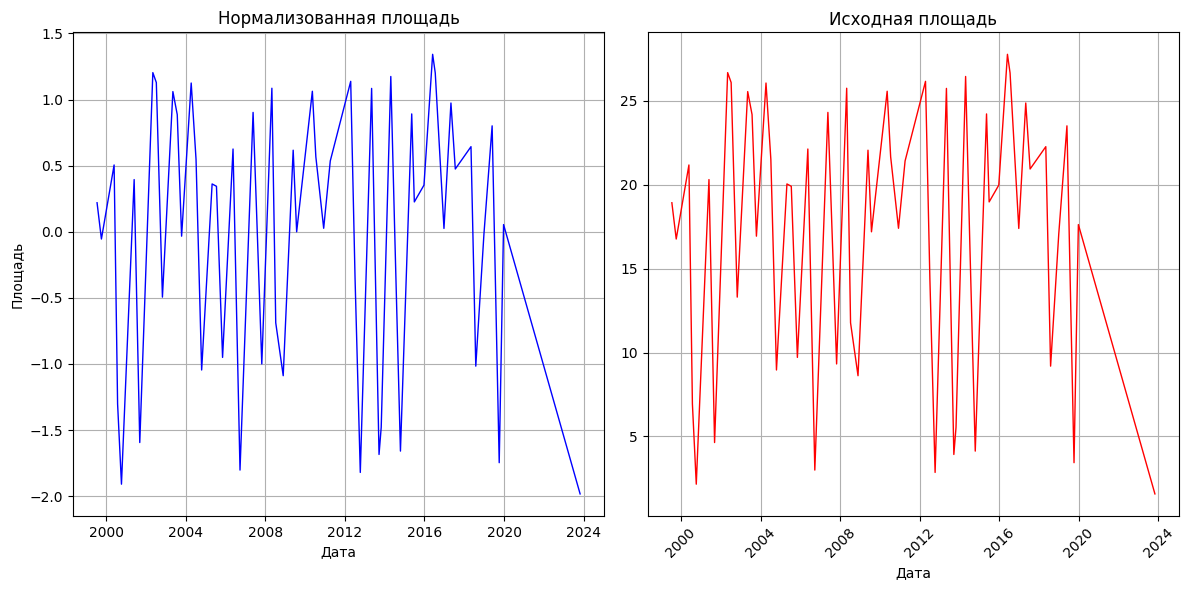

In [ ]:
import matplotlib.pyplot as plt

# Создаем поле графика
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Установка размера графика

# Подписи осей
ax[0].set_ylabel("Площадь")
ax[0].set_xlabel("Дата")
ax[1].set_xlabel("Дата")

# Заголовки графиков
ax[0].set_title("Нормализованная площадь")
ax[1].set_title("Исходная площадь")

# Сетка на осях
ax[0].grid()
ax[1].grid()

# Отображение нормализованных и ненормализованных данных
ax[0].plot(train_data['date'], train_data_normalized, c="b", linewidth=1)  # Нормализованная площадь
ax[1].plot(train_data['date'], train_data['area'], c="r", linewidth=1)  # Исходная площадь

# Поворот подписей осей для улучшения читаемости
plt.xticks(rotation=45)

plt.tight_layout()  # Улучшение компактности расположения графиков

plt.show()


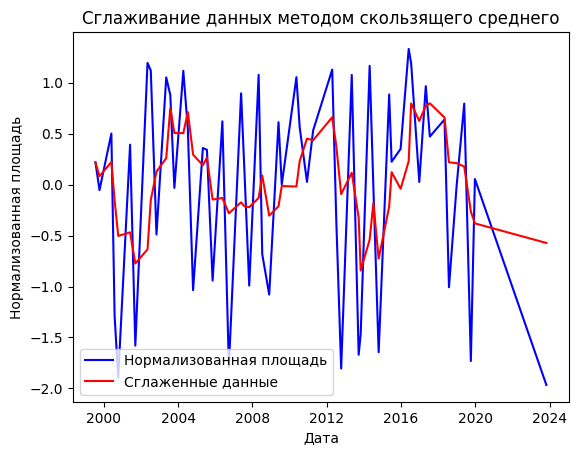

In [ ]:
window_size = 5  # Размер окна для скользящего среднего

# Нормализуем значения площади
mean_area = train_data['area'].mean()
std_area = train_data['area'].std()
normalized_area = (train_data['area'] - mean_area) / std_area

# Вычисляем скользящее среднее для нормализованных значений площади
sma_values = (
    normalized_area
    .rolling(window=window_size, min_periods=1)  # min_periods=1, чтобы начать с первой точки
    .mean()  # Вычисляем среднее в окне
)


fig, ax = plt.subplots()


ax.plot(train_data['date'], normalized_area, label='Нормализованная площадь', color='blue')

ax.plot(train_data['date'], sma_values, label='Сглаженные данные', color='red')

ax.set_xlabel('Дата')
ax.set_ylabel('Нормализованная площадь')
ax.set_title('Сглаживание данных методом скользящего среднего')

ax.legend()

plt.show()


Исходные тренировочные данные:
        date   area
0 1999-07-19  18,92
1 1999-10-07  16,76
2 2000-05-27  21,17
3 2000-07-30   6,94
4 2000-10-09   2,16


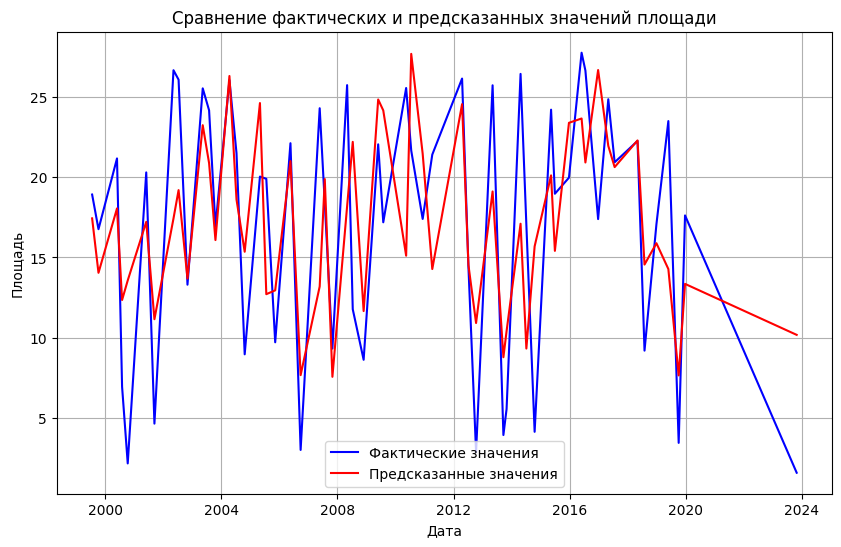

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import minimize

# Загрузка CSV-файла в DataFrame
train_data = pd.read_csv("/content/drive/MyDrive/trainkir.csv", delimiter=';')

# Преобразование столбца "date" в формат даты
train_data['date'] = pd.to_datetime(train_data['date'], format='%d.%m.%Y')

# Отображение первых нескольких строк данных
print("Исходные тренировочные данные:")
print(train_data.head())

# Преобразуем значения столбца "area" к числовому формату, заменяя запятые на точки
train_data['area'] = train_data['area'].str.replace(',', '.').astype(float)

# Значения на оси X (абсциссе), на основе которых модель будет делать предсказания
x_data = np.linspace(0, len(train_data), len(train_data))

# Дискретное Преобразование Фурье, список амплитуд
mfft = np.fft.fft(train_data['area'])

# Получаем индексы частот, которые соответствуют самым значимым (с высокой амплитудой) синусоидам.
imax = np.argsort(np.absolute(mfft))[::-1]

# Количество синусоид, которые мы будем суммировать
number_of_sinuses = 5

# Берем первые number_of_sinuses самых высоких амплитуд (они соответствуют частотам)
imax = imax[:number_of_sinuses]

# Вычисляем частоту каждой синусоиды
frequency = np.array(imax) / len(train_data)

# Определение функции потерь (MSE)
def loss_function(params, x, y):
    """
    Вычисляет среднеквадратичную ошибку (MSE) для модели с параметрами params.

    Параметры:
        - params: массив параметров модели.
        - x: массив значений на оси X.
        - y: массив фактических значений площади.

    Возвращает:
        - mse: значение среднеквадратичной ошибки (MSE).
    """
    # Количество наблюдений
    n = len(x)

    # Разделение параметров на амплитуды, частоты и сдвиги
    amplitudes = params[::3]
    frequencies = params[1::3]
    shifts = params[2::3]

    # Предсказанные значения площади
    predicted_values = np.array([
        np.sum([
            amplitudes[j] * np.sin(frequencies[j] * xi + shifts[j])
            for j in range(number_of_sinuses)
        ]) + bias
        for xi in x
    ])

    # Вычисление среднеквадратичной ошибки (MSE)
    mse = np.mean((predicted_values - y) ** 2)

    return mse

# Оптимизация параметров модели, минимизируя среднеквадратичную ошибку (MSE)
def optimize_parameters(params_init, x, y):
    """
    Оптимизирует параметры модели, минимизируя среднеквадратичную ошибку (MSE).

    Параметры:
        - params_init: начальное предположение о параметрах модели.
        - x: массив значений на оси X.
        - y: массив фактических значений площади.

    Возвращает:
        - optimized_params: оптимизированные параметры модели.
    """
    # Минимизация функции потерь с помощью метода градиентного спуска
    result = minimize(loss_function, params_init, args=(x, y), method='Nelder-Mead')

    # Оптимизированные параметры модели
    optimized_params = result.x

    return optimized_params

# Начальные параметры
init_params = np.array([
    np.array([np.std(train_data['area']), frequency[i] * 2 * np.pi, 0.0])
    for i in range(number_of_sinuses)
])

bias = np.mean(train_data['area'])

# Оптимизация параметров модели
optimized_params = optimize_parameters(init_params.flatten(), x_data, train_data['area'])

# Разделение оптимизированных параметров на амплитуды, частоты и сдвиги
optimized_amplitudes = optimized_params[::3]
optimized_frequencies = optimized_params[1::3]
optimized_shifts = optimized_params[2::3]

# Предсказанные значения площади
predicted_values = np.array([
    np.sum([
        optimized_amplitudes[j] * np.sin(optimized_frequencies[j] * xi + optimized_shifts[j])
        for j in range(number_of_sinuses)
    ]) + bias
    for xi in x_data
])

# Построение графика предсказанных значений и фактических значений площади
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['area'], label='Фактические значения', color='blue')
plt.plot(train_data['date'], predicted_values, label='Предсказанные значения', color='red')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.title('Сравнение фактических и предсказанных значений площади')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.optimizers import Adam

# Загрузка данных
train_data = pd.read_csv("/content/drive/MyDrive/trainkir.csv", delimiter=';')
train_data['date'] = pd.to_datetime(train_data['date'], format='%d.%m.%Y')
train_data['area'] = train_data['area'].str.replace(',', '.').astype(float)

# Нормализация данных
train_data_normalized = (train_data['area'] - train_data['area'].mean()) / train_data['area'].std()

# Дискретное Преобразование Фурье, список амплитуд
mfft = np.fft.fft(train_data_normalized)

# Получаем индексы частот, которые соответствуют самым значимым (с высокой амплитудой) синусоидам.
imax = np.argsort(np.absolute(mfft))[::-1]

# Количество синусов, которые мы будем суммировать
number_of_sinuses = 5

# Берем первые number_of_sinuses самых высоких амплитуд (они соответствуют частотам)
imax = imax[:number_of_sinuses]

# Вычисляем частоту каждой синусоиды
frequency = np.array(imax) / len(train_data_normalized)

# Начальные параметры
init_params = np.array([
    np.array([np.std(train_data_normalized), frequency[i] * 2 * np.pi, 0.0])
    for i in range(number_of_sinuses)
])
bias = np.mean(train_data_normalized)

# Определяем слой модели
class SinLayer(layers.Layer):
    def __init__(self):
        super(SinLayer, self).__init__()

    def build(self, _):
        self.kernel = self.add_weight(
            "kernel", shape=(number_of_sinuses, 3), trainable=True
        )
        self.bias = self.add_weight(name="bias", shape=(), trainable=True)

    def call(self, inputs):
        result = 0
        for i in range(number_of_sinuses):
            result += self.kernel[i][0] * tf.sin(
                self.kernel[i][1] * inputs + self.kernel[i][2]
            )
        return result + self.bias

# Создание модели
class SinModel(tf.keras.Model):
    def __init__(self):
        super(SinModel, self).__init__()
        self.sin_layer = SinLayer()

    def call(self, inputs):
        return self.sin_layer(inputs)

# Создание экземпляра модели
model = SinModel()

# Вызов модели на образце данных для построения
sample_input = np.array([[1.0]])  # Пример входных данных
_ = model(sample_input)

# Отображение информации о модели
model.summary()


Model: "sin_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sin_layer_1 (SinLayer)      multiple                  16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # Изменил импорт для использования keras.layers
from tensorflow.keras.optimizers import Adam  # Изменил импорт для использования keras.optimizers.Adam

# Загрузка данных
train_data = pd.read_csv("/content/drive/MyDrive/trainkir.csv", delimiter=';')
train_data['date'] = pd.to_datetime(train_data['date'], format='%d.%m.%Y')
train_data['area'] = train_data['area'].str.replace(',', '.').astype(float)

# Нормализация данных
train_data_normalized = (train_data['area'] - train_data['area'].mean()) / train_data['area'].std()

# Дискретное Преобразование Фурье, список амплитуд
mfft = np.fft.fft(train_data_normalized)

# Получаем индексы частот, которые соответствуют самым значимым (с высокой амплитудой) синусоидам.
imax = np.argsort(np.absolute(mfft))[::-1]

# Количество синусов, которые мы будем суммировать
number_of_sinuses = 5

# Берем первые number_of_sinuses самых высоких амплитуд (они соответствуют частотам)
imax = imax[:number_of_sinuses]

# Вычисляем частоту каждой синусоиды
frequency = np.array(imax) / len(train_data_normalized)

# Начальные параметры
init_params = np.array([
    np.array([np.std(train_data_normalized), frequency[i] * 2 * np.pi, 0.0])
    for i in range(number_of_sinuses)
])
bias = np.mean(train_data_normalized)

# Определяем слой модели
class SinLayer(layers.Layer):
    def __init__(self):
        super(SinLayer, self).__init__()

    def build(self, _):
        self.kernel = self.add_weight(
            "kernel", shape=(number_of_sinuses, 3), trainable=True
        )
        self.bias = self.add_weight(name="bias", shape=(), trainable=True)

    def call(self, inputs):
        result = 0
        for i in range(number_of_sinuses):
            result += self.kernel[i][0] * tf.sin(
                self.kernel[i][1] * inputs + self.kernel[i][2]
            )
        return result + self.bias

# Создание модели
class SinModel(tf.keras.Model):
    def __init__(self):
        super(SinModel, self).__init__()
        self.sin_layer = SinLayer()

    def call(self, inputs):
        return self.sin_layer(inputs)

# Создание экземпляра модели
model = SinModel()

# Вызов модели на образце данных для построения
sample_input = np.array([[1.0]])  # Пример входных данных
_ = model(sample_input)

# Отображение информации о модели
model.summary()


Model: "sin_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sin_layer_2 (SinLayer)      multiple                  16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sin_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sin_layer_3 (SinLayer)      multiple                  16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/260
2/2 [==============================] - 2s 11ms/step - loss: 2.1460
Epoch 2/260
2/2 [==============================] - 0s 11ms/step - loss: 2.0501
Epoch 3/260
2/2 [==============================] - 0s 11ms/step - loss: 1.9554
Epoch 4/260
2/2 [==============================] - 0s 7ms/step - loss: 1.8589
Epoch 5/260
2/2 [==============================] - 0s 7ms/step - loss: 1.7596
Epoch 6/260
2/2 [==============================] - 0s 7ms/step - loss: 1.6646
Epoch 7/260
2/2 [==============================] - 0s 9ms/step - loss: 1.5754


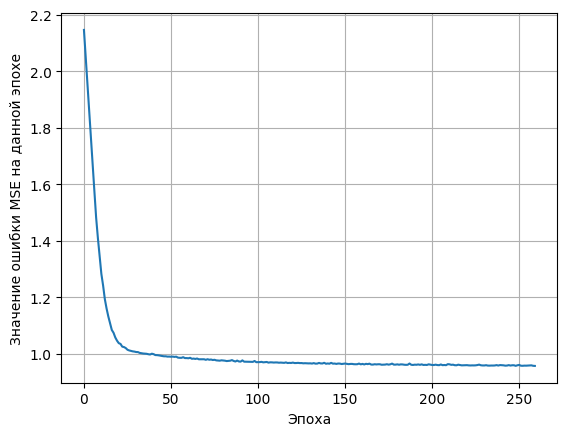

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Загрузка данных
train_data = pd.read_csv("/content/drive/MyDrive/trainkir.csv", delimiter=';')
train_data['date'] = pd.to_datetime(train_data['date'], format='%d.%m.%Y')
train_data['area'] = train_data['area'].str.replace(',', '.').astype(float)

# Нормализация данных
train_data_normalized = (train_data['area'] - train_data['area'].mean()) / train_data['area'].std()

# Дискретное Преобразование Фурье, список амплитуд
mfft = np.fft.fft(train_data_normalized)

# Получаем индексы частот, которые соответствуют самым значимым (с высокой амплитудой) синусоидам.
imax = np.argsort(np.absolute(mfft))[::-1]

# Количество синусов, которые мы будем суммировать
number_of_sinuses = 5

# Берем первые number_of_sinuses самых высоких амплитуд (они соответствуют частотам)
imax = imax[:number_of_sinuses]

# Вычисляем частоту каждой синусоиды
frequency = np.array(imax) / len(train_data_normalized)

# Начальные параметры
init_params = np.array([
    np.array([np.std(train_data_normalized), frequency[i] * 2 * np.pi, 0.0])
    for i in range(number_of_sinuses)
])
bias = np.mean(train_data_normalized)

# Определяем слой модели
class SinLayer(layers.Layer):
    def __init__(self):
        super(SinLayer, self).__init__()

    def build(self, _):
        self.kernel = self.add_weight(
            "kernel", shape=(number_of_sinuses, 3), trainable=True
        )
        self.bias = self.add_weight(name="bias", shape=(), trainable=True)

    def call(self, inputs):
        result = 0
        for i in range(number_of_sinuses):
            result += self.kernel[i][0] * tf.sin(
                self.kernel[i][1] * inputs + self.kernel[i][2]
            )
        return result + self.bias

# Создание модели
class SinModel(tf.keras.Model):
    def __init__(self):
        super(SinModel, self).__init__()
        self.sin_layer = SinLayer()

    def call(self, inputs):
        return self.sin_layer(inputs)

# Создание экземпляра модели
model = SinModel()

# Вызов модели на образце данных для построения
sample_input = np.array([[1.0]])  # Пример входных данных
_ = model(sample_input)

# Отображение информации о модели
model.summary()

# Изменение формы данных для обучения модели
x_data = train_data.index.values.reshape(-1, 1).astype(np.float32)
y_data = train_data_normalized.values.reshape(-1, 1).astype(np.float32)

# Компиляция модели
model.compile(Adam(0.001, 0.8, 0.9), "mean_squared_error")

# Обучение модели
history = model.fit(x=x_data, y=y_data, epochs=260, batch_size=32)

# Построение графика изменения ошибки по мере обучения
plt.plot(history.history["loss"])
plt.grid()
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки MSE на данной эпохе")
plt.show()


2/2 [==============================] - 0s 12ms/step


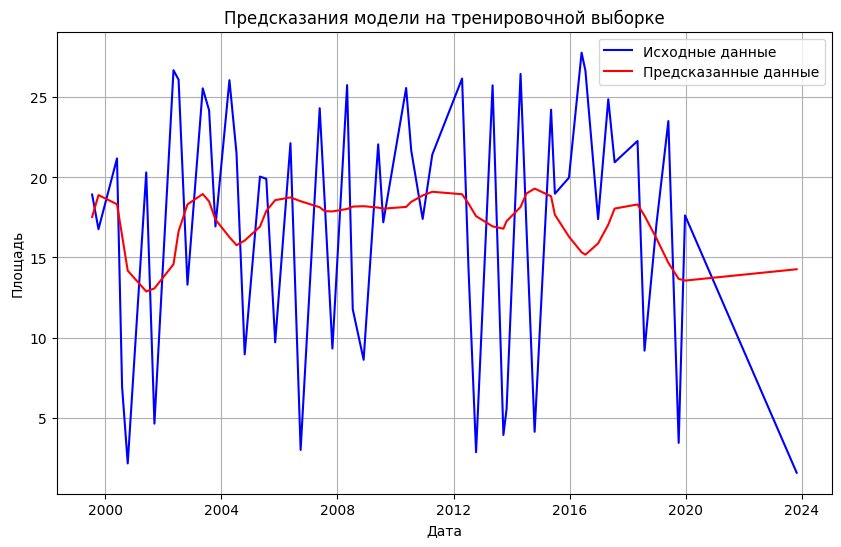

In [ ]:
# Денормализация данных
def de_normalize_data(normalized_data, original_mean, original_std):
    return normalized_data * original_std + original_mean

# Получение предсказаний модели
predicted_data_normalized = model.predict(x_data)

# Денормализация предсказанных данных
predicted_data = de_normalize_data(predicted_data_normalized, train_data['area'].mean(), train_data['area'].std())

# Построение графика предсказаний модели на тренировочной выборке
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['area'], label='Исходные данные', color='blue')
plt.plot(train_data['date'], predicted_data, label='Предсказанные данные', color='red')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.title('Предсказания модели на тренировочной выборке')
plt.legend()
plt.grid(True)
plt.show()


Model: "sin_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sin_layer_4 (SinLayer)      multiple                  16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
2/2 [==============================] - 1s 9ms/step - loss: 1.6726
Epoch 2/300
2/2 [==============================] - 0s 12ms/step - loss: 1.6510
Epoch 3/300
2/2 [==============================] - 0s 9ms/step - loss: 1.6346
Epoch 4/300
2/2 [==============================] - 0s 10ms/step - loss: 1.6150
Epoch 5/300
2/2 [==============================] - 0s 7ms/step - loss: 1.5987
Epoch 6/300
2/2 [==============================] - 0s 9ms/step - loss: 1.5807
Epoch 7/300
2/2 [==============================] - 0s 7ms/step - loss: 1.5639
E

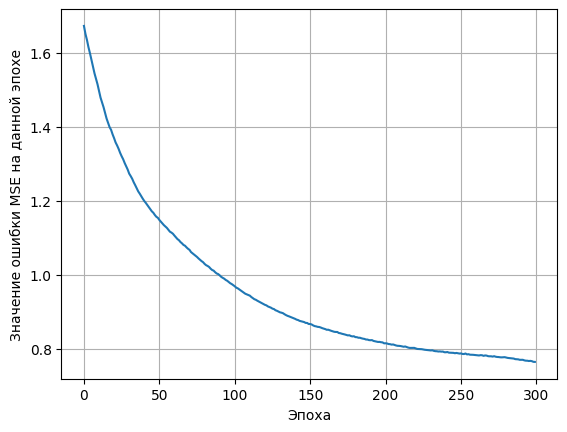

2/2 [==============================] - 0s 9ms/step


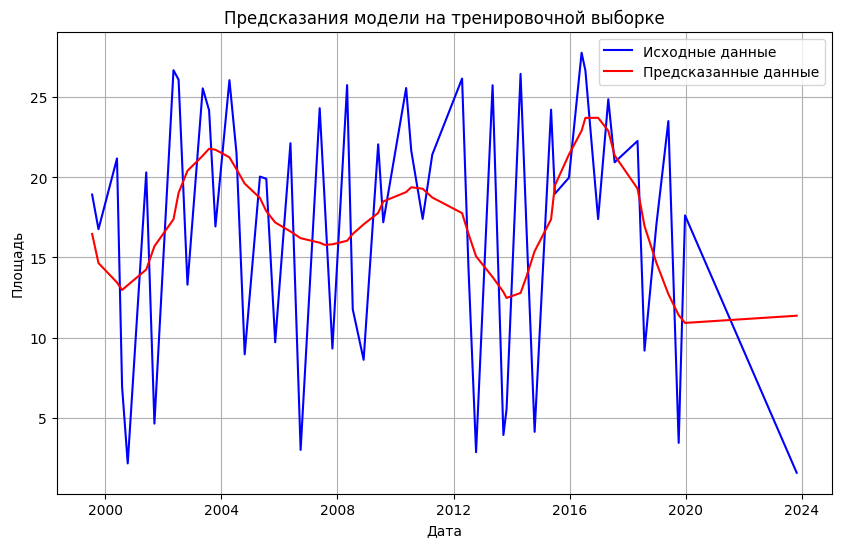

4/4 [==============================] - 0s 3ms/step


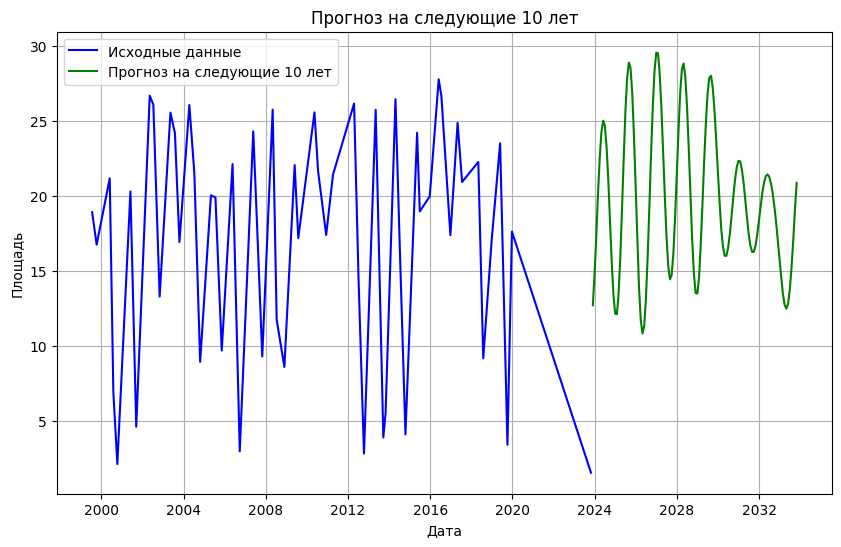

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers  # Importing layers module from tensorflow.keras
from tensorflow.keras.optimizers import Adam
# Загрузка данных
train_data = pd.read_csv("/content/drive/MyDrive/trainkir.csv", delimiter=';')
train_data['date'] = pd.to_datetime(train_data['date'], format='%d.%m.%Y')
train_data['area'] = train_data['area'].str.replace(',', '.').astype(float)

# Нормализация данных
train_data_normalized = (train_data['area'] - train_data['area'].mean()) / train_data['area'].std()

# Дискретное Преобразование Фурье, список амплитуд
mfft = np.fft.fft(train_data_normalized)

# Получаем индексы частот, которые соответствуют самым значимым (с высокой амплитудой) синусоидам.
imax = np.argsort(np.absolute(mfft))[::-1]

# Количество синусов, которые мы будем суммировать
number_of_sinuses = 5

# Берем первые number_of_sinuses самых высоких амплитуд (они соответствуют частотам)
imax = imax[:number_of_sinuses]

# Вычисляем частоту каждой синусоиды
frequency = np.array(imax) / len(train_data_normalized)

# Начальные параметры
init_params = np.array([
    np.array([np.std(train_data_normalized), frequency[i] * 2 * np.pi, 0.0])
    for i in range(number_of_sinuses)
])
bias = np.mean(train_data_normalized)

# Определяем слой модели
class SinLayer(layers.Layer):
    def __init__(self):
        super(SinLayer, self).__init__()

    def build(self, _):
        self.kernel = self.add_weight(
            "kernel", shape=(number_of_sinuses, 3), trainable=True
        )
        self.bias = self.add_weight(name="bias", shape=(), trainable=True)

    def call(self, inputs):
        result = 0
        for i in range(number_of_sinuses):
            result += self.kernel[i][0] * tf.sin(
                self.kernel[i][1] * inputs + self.kernel[i][2]
            )
        return result + self.bias

# Создание модели
class SinModel(tf.keras.Model):
    def __init__(self):
        super(SinModel, self).__init__()
        self.sin_layer = SinLayer()

    def call(self, inputs):
        return self.sin_layer(inputs)

# Создание экземпляра модели
model = SinModel()

# Вызов модели на образце данных для построения
sample_input = np.array([[1.0]])  # Пример входных данных
_ = model(sample_input)

# Отображение информации о модели
model.summary()

# Изменение формы данных для обучения модели
x_data = train_data.index.values.reshape(-1, 1).astype(np.float32)
y_data = train_data_normalized.values.reshape(-1, 1).astype(np.float32)

# Компиляция модели
model.compile(Adam(0.001, 0.8, 0.9), "mean_squared_error")

# Обучение модели
history = model.fit(x=x_data, y=y_data, epochs=300, batch_size=32)

# Построение графика изменения ошибки по мере обучения
plt.plot(history.history["loss"])
plt.grid()
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки MSE на данной эпохе")
plt.show()

# Денормализация данных
def de_normalize_data(normalized_data, original_mean, original_std):
    return normalized_data * original_std + original_mean

# Получение предсказаний модели
predicted_data_normalized = model.predict(x_data)

# Денормализация предсказанных данных
predicted_data = de_normalize_data(predicted_data_normalized, train_data['area'].mean(), train_data['area'].std())

# Построение графика предсказаний модели на тренировочной выборке
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['area'], label='Исходные данные', color='blue')
plt.plot(train_data['date'], predicted_data, label='Предсказанные данные', color='red')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.title('Предсказания модели на тренировочной выборке')
plt.legend()
plt.grid(True)
plt.show()

# Генерация дат для следующих 10 лет
future_dates = pd.date_range(start=train_data['date'].iloc[-1], periods=10*12+1, freq='M')[1:]

# Преобразование индексов в формат float32
x_future = np.arange(len(train_data), len(train_data) + len(future_dates)).reshape(-1, 1).astype(np.float32)

# Предсказание на будущих данных
predicted_future_normalized = model.predict(x_future)

# Денормализация предсказанных данных
predicted_future = de_normalize_data(predicted_future_normalized, train_data['area'].mean(), train_data['area'].std())

# Построение графика предсказаний на будущие 10 лет
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['area'], label='Исходные данные', color='blue')
plt.plot(future_dates, predicted_future, label='Прогноз на следующие 10 лет', color='green')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.title('Прогноз на следующие 10 лет')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Sample data with problematic date format
train_data_str = """
date        area
19.07.1999 18,92
07.10.1999 16,76
27.05.2000 21,17
30.07.2000 6,94
09.10.2000 2,16
30.05.2001 20,3
10.09.2001 4,64
08.05.2002 26,67
11.07.2002 26,08
31.10.2002 13,3
11.05.2003 25,54
30.07.2003 24,17
18.10.2003 16,93
11.04.2004 26,05
09.07.2004 21,5
20.10.2004 8,96
30.04.2005 20,04
19.07.2005 19,9
08.11.2005 9,71
19.05.2006 22,12
24.09.2006 3
22.05.2007 24,3
25.07.2007 18,39
29.10.2007 9,32
01.05.2008 25,74
11.07.2008 11,77
25.11.2008 8,62
27.05.2009 22,05
30.07.2009 17,19
14.05.2010 25,56
17.07.2010 21,66
08.12.2010 17,4
08.04.2011 21,41
17.04.2012 26,15
06.07.2012 14,4
10.10.2012 2,86
06.05.2013 25,73
19.09.2013 3,93
29.10.2013 5,55
23.04.2014 26,44
05.07.2014 17,03
17.10.2014 4,13
12.05.2015 24,21
29.06.2015 18,97
23.12.2015 19,97
30.05.2016 27,76
17.07.2016 26,65
24.12.2016 17,39
01.05.2017 24,86
20.07.2017 20,93
04.05.2018 22,26
31.07.2018 9,19
28.12.2018 17,07
27.05.2019 23,5
04.10.2019 3,44
23.12.2019 17.62
28.10.2023 1,58
"""

# Read the data from the string
train_data = pd.read_csv(StringIO(train_data_str), delim_whitespace=True)

# Convert the "date" column to datetime format, trying multiple formats
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce', format='%d.%m.%Y')

# Check for rows where the date format conversion failed
invalid_date_rows = train_data[train_data['date'].isnull()]

# Print rows with invalid date format
print("Rows with invalid date format:")
print(invalid_date_rows)

# Drop rows with invalid date format
train_data = train_data.dropna(subset=['date'])

# Normalize the "area" column
train_data['area'] = train_data['area'].str.replace(',', '.').astype(float)
train_data_normalized = (train_data['area'] - train_data['area'].mean()) / train_data['area'].std()

# Fourier transform
mfft = np.fft.fft(train_data_normalized)
imax = np.argsort(np.absolute(mfft))[::-1]
number_of_sinuses = 5
imax = imax[:number_of_sinuses]
frequency = np.array(imax) / len(train_data_normalized)

# Initial parameters
init_params = np.array([
    np.array([np.std(train_data_normalized), frequency[i] * 2 * np.pi, 0.0])
    for i in range(number_of_sinuses)
])
bias = np.mean(train_data_normalized)

# Define model layer
class SinLayer(layers.Layer):
    def __init__(self):
        super(SinLayer, self).__init__()

    def build(self, _):
        self.kernel = self.add_weight(
            "kernel", shape=(number_of_sinuses, 3), trainable=True
        )
        self.bias = self.add_weight(name="bias", shape=(), trainable=True)

    def call(self, inputs):
        result = 0
        for i in range(number_of_sinuses):
            result += self.kernel[i][0] * tf.sin(
                self.kernel[i][1] * inputs + self.kernel[i][2]
            )
        return result + self.bias

# Define model
class SinModel(tf.keras.Model):
    def __init__(self):
        super(SinModel, self).__init__()
        self.sin_layer = SinLayer()

    def call(self, inputs):
        return self.sin_layer(inputs)

# Create model instance
model = SinModel()

# Sample input
sample_input = np.array([[1.0]])  # Sample input data
_ = model(sample_input)

# Display model information
model.summary()

# Reshape data for model training
x_data = train_data.index.values.reshape(-1, 1).astype(np.float32)
y_data = train_data_normalized.values.reshape(-1, 1).astype(np.float32)

# Compile the model
model.compile(Adam(0.001, 0.8, 0.9), "mean_squared_error")

# Train the model
history = model.fit(x=x_data, y=y_data, epochs=300, batch_size=32)

# Plot the loss curve during training
plt.plot(history.history["loss"])
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

# Denormalize data
def de_normalize_data(normalized_data, original_mean, original_std):
    return normalized_data * original_std + original_mean

# Predictions
predicted_data_normalized = model.predict(x_data)

# Denormalize predictions
predicted_data = de_normalize_data(predicted_data_normalized, train_data['area'].mean(), train_data['area'].std())

# Plot predictions on the training data
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['area'], label='Original Data', color='blue')
plt.plot(train_data['date'], predicted_data, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Area')
plt.title('Model Predictions on Training Data')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'StringIO' is not defined

4/4 [==============================] - 0s 3ms/step


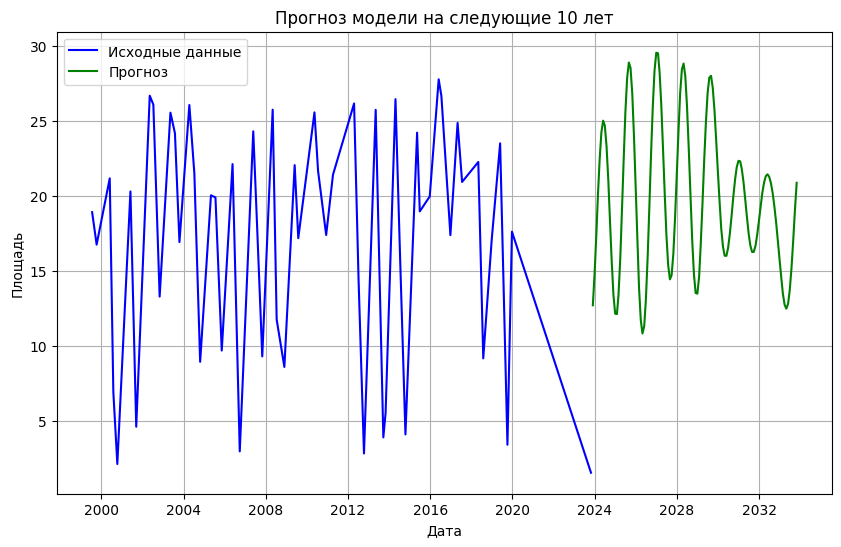

In [ ]:
# Получение последней даты в наборе данных
last_date = train_data['date'].max()

# Создание списка для хранения будущих дат (10 лет)
future_dates = pd.date_range(start=last_date, periods=10*12+1, freq='M')[1:]

# Преобразование будущих дат в индексы
future_indices = np.arange(len(train_data), len(train_data) + len(future_dates)).reshape(-1, 1).astype(np.float32)

# Прогнозирование площади на будущие даты
predicted_future_normalized = model.predict(future_indices)

# Денормализация предсказанных данных
predicted_future = de_normalize_data(predicted_future_normalized, train_data['area'].mean(), train_data['area'].std())

# Построение графика предсказаний на будущие даты
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['area'], label='Исходные данные', color='blue')
plt.plot(future_dates, predicted_future, label='Прогноз', color='green')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.title('Прогноз модели на следующие 10 лет')
plt.legend()
plt.grid(True)
plt.show()


Прогноз на 10 лет

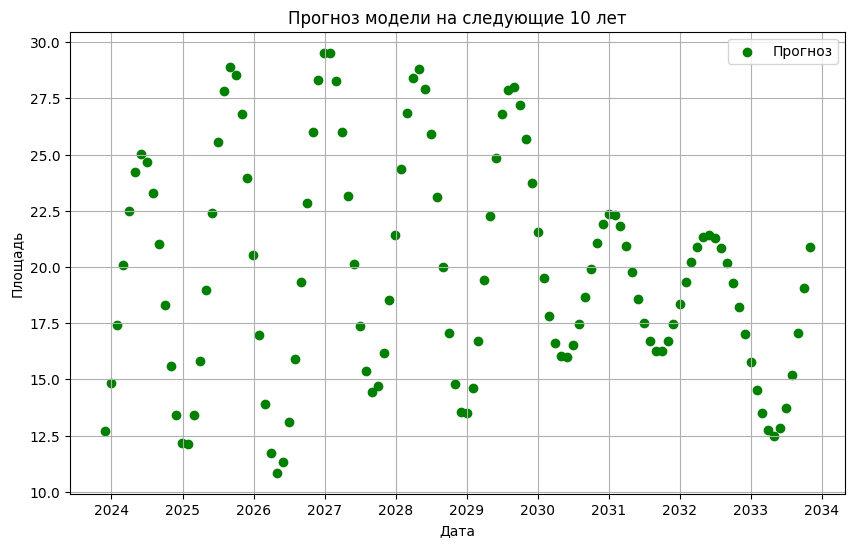

In [ ]:
# Построение точечного графика предсказаний на будущие даты
plt.figure(figsize=(10, 6))
plt.scatter(future_dates, predicted_future, label='Прогноз', color='green', marker='o')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.title('Прогноз модели на следующие 10 лет')
plt.legend()
plt.grid(True)
plt.show()


Прогноз на 20 лет

8/8 [==============================] - 0s 8ms/step


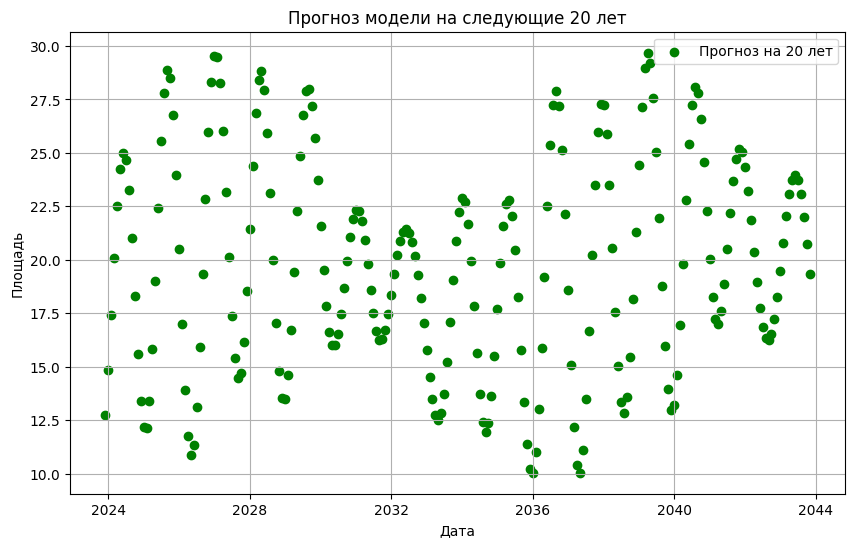

In [ ]:
future_dates_20_years = pd.date_range(start=last_date, periods=20*12+1, freq='M')[1:]
future_indices_20_years = np.arange(len(train_data), len(train_data) + len(future_dates_20_years)).reshape(-1, 1).astype(np.float32)
predicted_future_20_years_normalized = model.predict(future_indices_20_years)
predicted_future_20_years = de_normalize_data(predicted_future_20_years_normalized, train_data['area'].mean(), train_data['area'].std())

plt.figure(figsize=(10, 6))
plt.scatter(future_dates_20_years, predicted_future_20_years, label='Прогноз на 20 лет', color='green', marker='o')
plt.xlabel('Дата')
plt.ylabel('Площадь')
plt.title('Прогноз модели на следующие 20 лет')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("/path/to/your/data.csv")
data['Дата'] = pd.to_datetime(data['Дата'])
data['Площадь'] = data['Площадь'].str.replace(',', '.').astype(float)

# Подсчет корреляции
correlation = data.corr(method='pearson')
print(correlation)


In [ ]:
import pandas as pd

# Загрузка данных из файла Excel
file_path = '/content/МЕТЕОРОЛОГИЧЕСКАЯ БАЗА ДАННЫХ.xlsx'
data = pd.read_excel(file_path, skiprows=[0, 1])  # Пропускаем первые две строки

# Преобразование столбца 'Дата' в формат datetime
data['Дата'] = pd.to_datetime(data['Дата'], format='%d.%m.%Y')

# Замена запятых на точки и преобразование строковых значений в числовой формат
for column in ['Сред', 'Макс', 'Мин']:
    data[column] = data[column].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

# Вывод первых строк данных для проверки
print(data.head())


  Станция       Дата  Сред  Макс  Мин
0   Тараз 2000-01-01   6.2  12.1  2.6
1   Тараз 2000-01-02   1.7   5.7 -0.7
2   Тараз 2000-01-03  -0.9   0.5 -1.6
3   Тараз 2000-01-04  -4.0  -1.5 -5.5
4   Тараз 2000-01-05   1.3  11.5 -5.0


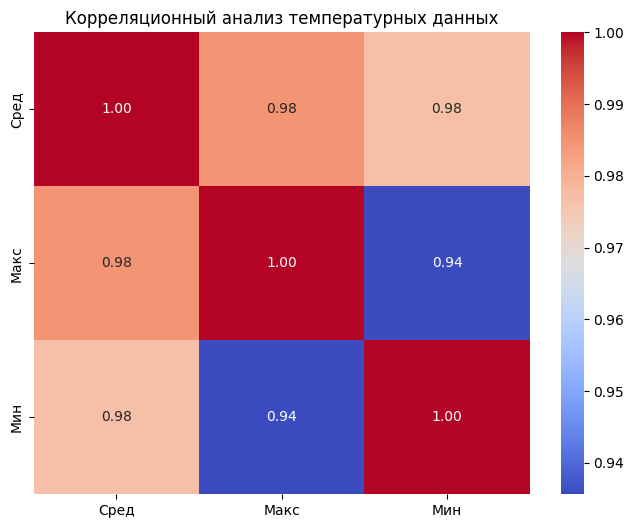

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Расчет корреляционной матрицы
correlation_matrix = data[['Сред', 'Макс', 'Мин']].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционный анализ температурных данных')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Подготовка данных для моделирования
X = data[['Макс', 'Мин']]
y = data['Сред']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.7749146845741295


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
gb_y_pred = gb_model.predict(X_test)

# Оценка качества модели
gb_mse = mean_squared_error(y_test, gb_y_pred)
print('Gradient Boosting Mean Squared Error:', gb_mse)


Gradient Boosting Mean Squared Error: 0.7148718036760587


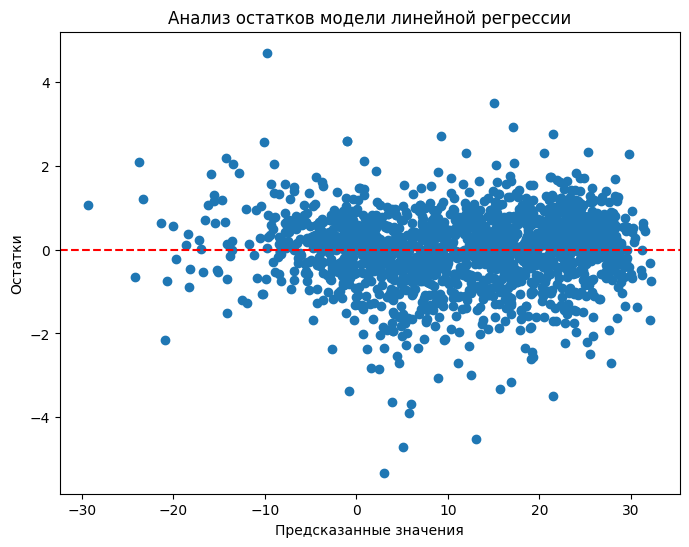

In [ ]:
# Вычисление остатков
residuals = y_test - y_pred

# Визуализация остатков
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков модели линейной регрессии')
plt.show()


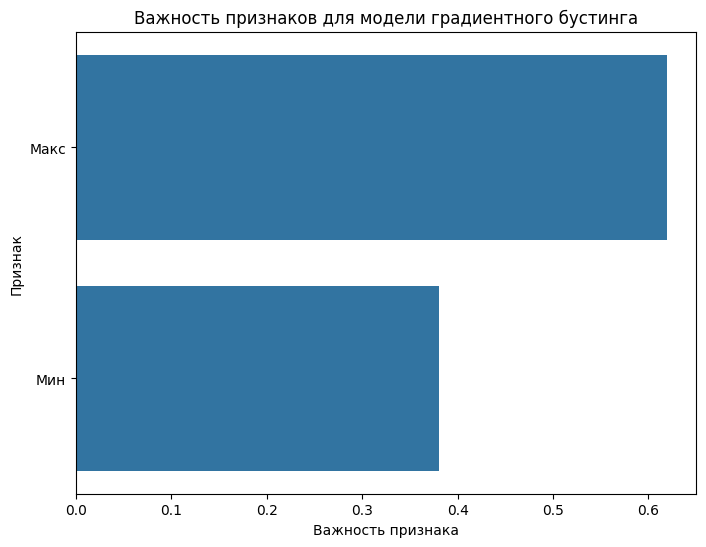

In [ ]:
# Визуализация важности признаков
feature_importance = gb_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков для модели градиентного бустинга')
plt.show()


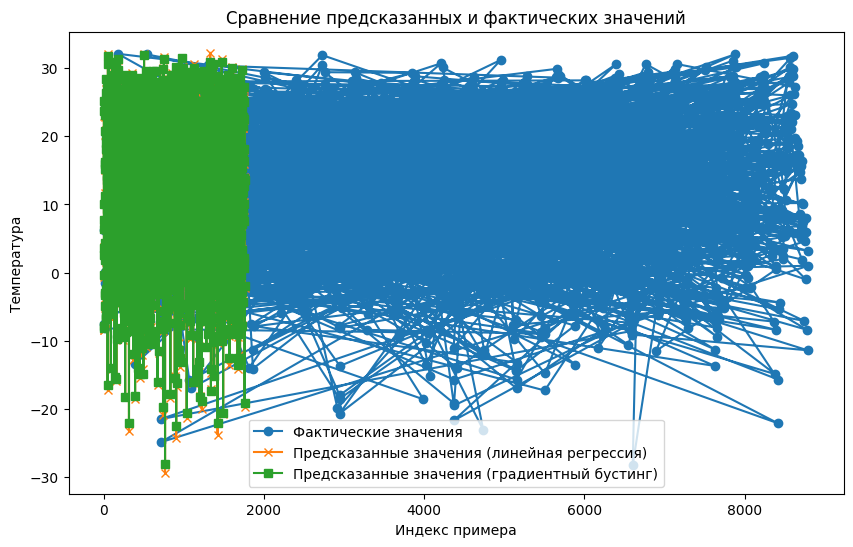

In [ ]:
# Визуализация предсказанных и фактических значений для обеих моделей
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Фактические значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения (линейная регрессия)', marker='x')
plt.plot(gb_y_pred, label='Предсказанные значения (градиентный бустинг)', marker='s')
plt.xlabel('Индекс примера')
plt.ylabel('Температура')
plt.title('Сравнение предсказанных и фактических значений')
plt.legend()
plt.show()


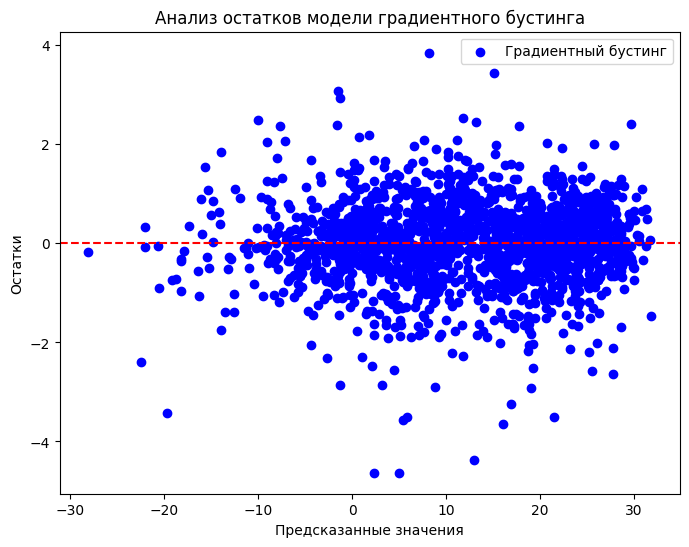

In [ ]:
# Вычисление остатков для модели градиентного бустинга
gb_residuals = y_test - gb_y_pred

# Визуализация остатков для модели градиентного бустинга
plt.figure(figsize=(8, 6))
plt.scatter(gb_y_pred, gb_residuals, color='blue', label='Градиентный бустинг')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков модели градиентного бустинга')
plt.legend()
plt.show()


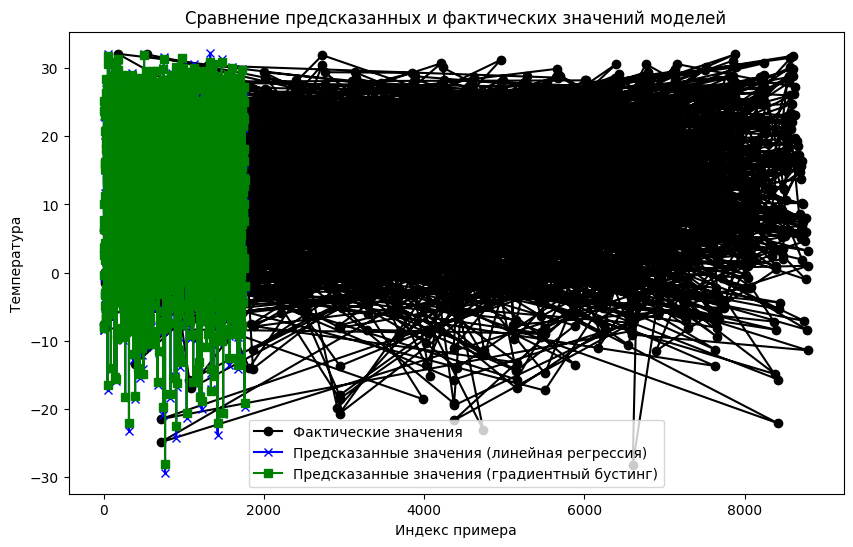

In [ ]:
# Визуализация сравнения производительности моделей
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Фактические значения', marker='o', color='black')
plt.plot(y_pred, label='Предсказанные значения (линейная регрессия)', marker='x', color='blue')
plt.plot(gb_y_pred, label='Предсказанные значения (градиентный бустинг)', marker='s', color='green')
plt.xlabel('Индекс примера')
plt.ylabel('Температура')
plt.title('Сравнение предсказанных и фактических значений моделей')
plt.legend()
plt.show()


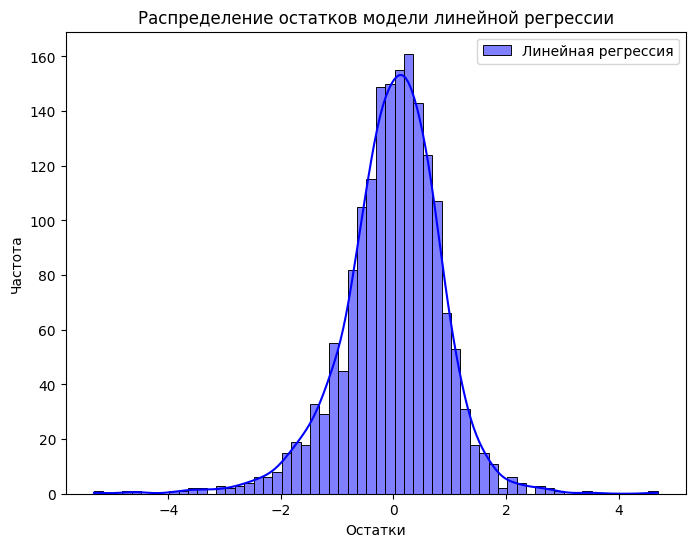

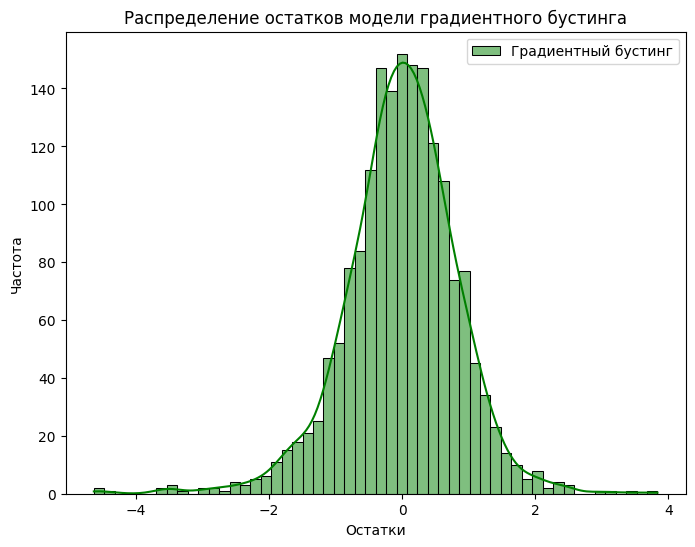

In [ ]:
# Визуализация распределения остатков для модели линейной регрессии
plt.figure(figsize=(8, 6))
sns.histplot(residuals, color='blue', kde=True, label='Линейная регрессия')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков модели линейной регрессии')
plt.legend()
plt.show()

# Визуализация распределения остатков для модели градиентного бустинга
plt.figure(figsize=(8, 6))
sns.histplot(gb_residuals, color='green', kde=True, label='Градиентный бустинг')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков модели градиентного бустинга')
plt.legend()
plt.show()


<ipython-input-19-a011e0ccb8fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Модель', y='MSE', data=mse_df, palette='Set2')


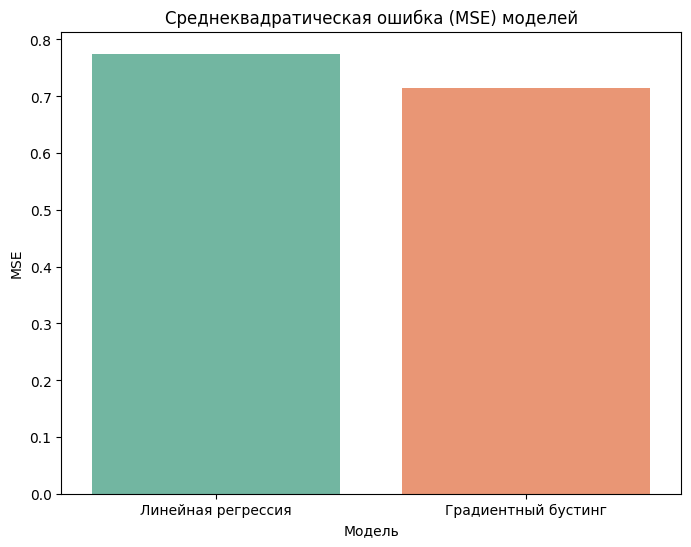

In [ ]:
# Визуализация среднеквадратических ошибок (MSE) моделей
mse_data = {'Модель': ['Линейная регрессия', 'Градиентный бустинг'],
            'MSE': [mse, gb_mse]}
mse_df = pd.DataFrame(mse_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Модель', y='MSE', data=mse_df, palette='Set2')
plt.title('Среднеквадратическая ошибка (MSE) моделей')
plt.xlabel('Модель')
plt.ylabel('MSE')
plt.show()
